In [1]:
# 한글 설정
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

### 판매량 및 소비자조사 결과 대조

#### 플레이버 별 판매량

In [2]:
# 10개월(21년2월~12월) 의 판매데이터 활용 
import os
import pandas as pd
path = './dataset'
files = os.listdir(path)[1:]
files = [path+'/'+file for file in files]

df = pd.concat({c.split('/')[-1].split('.')[0]:pd.read_csv(c,encoding= "EUC-KR",index_col=None) for c in files})
df = df.reset_index().drop('level_1', axis=1)
c = ['YYMM', 'CMP_CD', 'ITEM_PLU_CD', 'ITEM', 'SALE_QTY']
df.columns = c
df.ITEM= df.ITEM.apply(lambda x: x.strip()).apply(lambda x: x.replace('\u3000',''))

ITEM = df.ITEM.unique()
{str(df[df.ITEM == c]['ITEM_PLU_CD'].unique()[0]):[str(c),] for c in ITEM}

def check_name(icecream):
    nm = list(df.ITEM.unique())
    item_d = {str(df[df.ITEM == c]['ITEM_PLU_CD'].unique()[0]):str(c) for c in nm}
    df_item = pd.Series(item_d)
    check = df_item[df_item.str.contains(icecream)]
    return check,f'{len(check)}개'

check_name('꼬')

(A56071    아이스 꼬북칩
 dtype: object,
 '1개')

YYMM
2102          0.0
2103          0.0
2104          0.0
2105          0.0
2106          0.0
2107          0.0
2108          0.0
2109          0.0
2110          0.0
2111       7732.0
2112    1565889.0
2201      23906.0
2202       3020.0
2203       1427.0
All     1601974.0
Name: 아이스 고디바 초콜릿, dtype: float64

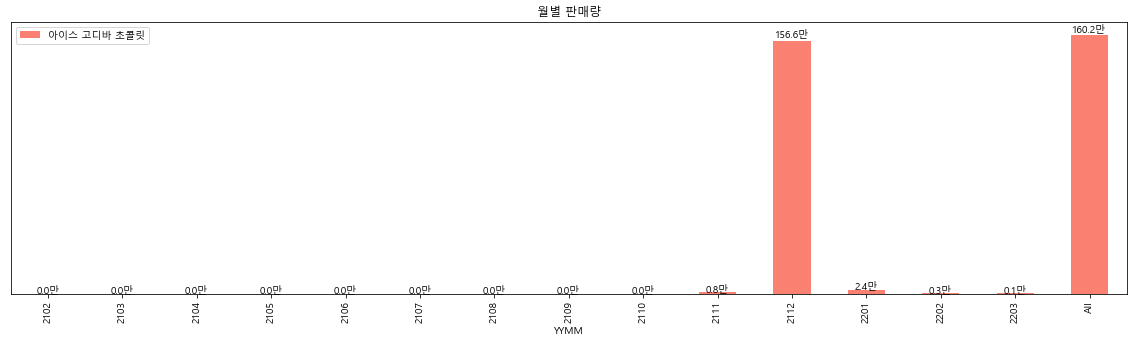

In [3]:
flavor = '아이스 고디바 초콜릿'
sale_df = df.pivot_table(values='SALE_QTY',aggfunc='sum',index='YYMM',columns=['ITEM'], margins= True).T.fillna(0).sort_values('All',ascending=False)
sale_df.loc[flavor]
ax = sale_df.loc[flavor].plot(kind= 'bar', figsize=(20,5), color ='salmon', legend = flavor, title = '월별 판매량')
ax.axes.yaxis.set_visible(False)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f"{height/1e4:0.1f}만",(left+width/2, height*1.01), ha='center')


sale_df.loc[flavor]

ITEM
아이스 고디바 초콜릿     10.30
엄마는 외계인         10.18
민트 초콜릿 칩         6.00
레인보우 샤베트         5.37
뉴욕치즈케이크          5.00
사랑에 빠진 딸기        4.30
아몬드 봉봉(사용안함)     4.17
아몬드 봉봉           4.04
체리쥬빌레            3.84
오레오 쿠키앤크림        3.71
31-요거트           3.65
New 슈팅스타         3.64
베리베리 스트로베리       3.53
바람과함께사라지다        3.30
그린티              2.67
초콜릿 무스           2.26
피스타치오 아몬드        2.15
우.낀.소            2.01
자모카 아몬드 훠지       1.79
망고탱고             1.72
Name: 2112, dtype: float64

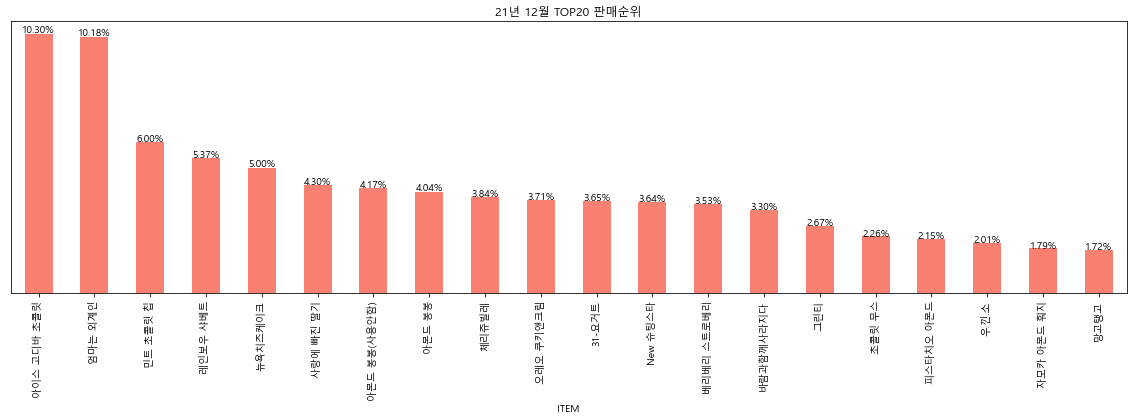

In [4]:
# 비율로 변경, 월별 판매비중 확인
sale_df_ratio = round(sale_df/sale_df.loc['All',:]*100,2)[1:]
yymm = '2112'
Top_no = 20

ax = sale_df_ratio.loc[:,yymm].sort_values(ascending = False)[:Top_no].plot(kind='bar',figsize=(20,5), color ='salmon', title = f'{yymm[:2]}년 {yymm[2:]}월 TOP{Top_no} 판매순위')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f"{height:.2f}%" ,(left+width/2, height*1.01), ha='center')
ax.axes.yaxis.set_visible(False)
sale_df_ratio.loc[:,yymm].sort_values(ascending = False)[:Top_no]

#### 소비자 조사

In [5]:
import numpy as np

item = pd.read_csv('./리스트_copy.csv',encoding='euc-kr')
columns = ['조사일자', '제품명', '제품코드', '컨셉만족도', '외관만족도', '맛만족도', '전반만족도', '구매의향', '봄',	'여름',	'가을',	'겨울','비고']
item.columns = columns
item.제품명 = item.제품명.str.strip()
idx = 0
contents = ['ITEM_PLU_CD','SALE_QTY_MM','NO_SALE_MM']
item.iloc[[idx]]

nm2cd = {str(c):str(df[df.ITEM == c]['ITEM_PLU_CD'].unique()[0]) for c in ITEM}

def nm2cd_f(nm):
    try :
        return nm2cd[nm]
    except :
        return np.NaN

item['제품코드'] = item['제품명'].apply(lambda x : nm2cd_f(x))

# 월 평균 판매량 집계 함수 생성
def check_qty(item):
    month = sale_df.loc[item] != 0
    sale_mt_no = len(sale_df.loc[item][month])-1
    max_sales = sale_df.loc[item][:14].max()
    max_sales_month = sale_df.loc[item][:14].argmax()
    return round(sale_df.loc[item]['All'],2),round(sale_df.loc[item]['All']/sale_mt_no,2),sale_mt_no,max_sales,max_sales_month

# 상품별 월평균판매량 정렬
item_d = {idx:[df.ITEM_PLU_CD.unique()[idx], nm, check_qty(nm)[0], check_qty(nm)[1], check_qty(nm)[2],check_qty(nm)[3],check_qty(nm)[4]] for idx, nm in enumerate(df.ITEM.unique())}
item_df = pd.DataFrame(item_d).T
columns=['ITEM_PLU_CD','ITEM_NM','SALE_QTY','SALE_QTY_MM','NO_SALE_MM','SALE_QTY_MAX','SALE_MM_MAX']
item_df.columns = columns
item_df = item_df.fillna(0).sort_values('SALE_QTY_MM',ascending=False)
item_df.to_csv('./output/월별판매량.csv', encoding = 'euc-kr')

def sale(ft,nm):
    try :
        return item_df[item_df['ITEM_NM'] == nm][ft].values[0]
    except :
        return np.NaN
    
item['총판매량'] = item['제품명'].apply(lambda x : sale('SALE_QTY',x))
item['월평균판매량'] = item['제품명'].apply(lambda x : sale('SALE_QTY_MM',x))
item['판매개월수'] = item['제품명'].apply(lambda x : sale('NO_SALE_MM',x))
item['최대월판매량'] = item['제품명'].apply(lambda x : sale('SALE_QTY_MAX',x))
item['최대판매월'] = item['제품명'].apply(lambda x : sale('SALE_MM_MAX',x))
c = ['조사일자', '제품명', '제품코드', '컨셉만족도', '외관만족도', '맛만족도', '전반만족도', '구매의향','총판매량', '월평균판매량', '판매개월수', '최대월판매량', '최대판매월', '봄',	'여름',	'가을',	'겨울', '비고']
item = item[c]
# item.loc[:,:'최대판매월'].fillna(item.median(), inplace = True)
item.to_csv('./output/리스트_.csv', encoding = 'euc-kr')

# 제품코드 없는 항목 날리기 
item_dropna = pd.concat([item[item.제품코드 == c] for c in item.제품코드.dropna()])
item_dropna.to_csv('./output/리스트_dropna.csv', encoding = 'euc-kr')
item_dropna

,조사일자,제품명,제품코드,컨셉만족도,외관만족도,맛만족도,전반만족도,구매의향,총판매량,월평균판매량,판매개월수,최대월판매량,최대판매월,봄,여름,가을,겨울,비고
0,220427,오버더 레인보우 샤베트,A56060,5.1,5.5,5.4,5.4,5.0,1721366.0,143447.17,12.0,900152.0,4.0,0.500,1.000,0.179,0.107,NaN
1,220427,꿀에 빠진 바나나와 망고,A56063,5.3,5.4,5.4,5.3,5.0,986499.0,98649.90,10.0,653041.0,5.0,0.393,0.821,0.321,0.286,NaN
4,220511,꿀에 빠진 바나나와 망고,A56063,5.3,5.5,5.5,5.4,5.3,986499.0,98649.90,10.0,653041.0,5.0,0.607,0.929,0.107,0.107,NaN
16,220525,꿀에 빠진 바나나와 망고,A56063,5.1,5.4,5.3,5.2,5.0,986499.0,98649.90,10.0,653041.0,5.0,0.367,0.850,0.133,0.133,NaN
1,220427,꿀에 빠진 바나나와 망고,A56063,5.3,5.4,5.4,5.3,5.0,986499.0,98649.90,10.0,653041.0,5.0,0.393,0.821,0.321,0.286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,211213,오레오 쿠키 앤 스트로베리,A56089,5.0,5.3,5.6,5.4,5.5,858187.0,429093.50,2.0,849372.0,13.0,0.767,0.333,0.150,0.600,NaN
48,211117,사랑에 빠진 외계인,A56093,5.8,5.3,5.3,5.2,5.2,6428.0,6428.00,1.0,6428.0,13.0,0.367,0.467,0.350,0.683,NaN
52,211213,사랑에 빠진 외계인,A56093,6.0,5.6,5.3,5.1,4.9,6428.0,6428.00,1.0,6428.0,13.0,0.600,0.567,0.417,0.567,NaN
56,220104,우연한 딸기,A56090,5.0,4.6,4.7,4.5,4.2,285287.0,142643.50,2.0,271348.0,13.0,0.717,0.333,0.100,0.533,상품 2종 비교조사


In [6]:
item_dropna.reset_index(drop = True, inplace= True)
sns.pairplot(item_dropna)

NameError: name 'sns' is not defined

In [ ]:
import seaborn as sns
corr_matrix = item_dropna.corr().round(2)
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

#### 예측 모델

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = item_dropna[['컨셉만족도','외관만족도','맛만족도','전반만족도','구매의향']]
# X = item_dropna[['맛만족도','전반만족도','구매의향']]
y = item_dropna['월평균판매량']
X.fillna(item_dropna.median(), inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
model.score(X_test,y_test)

전반적인 만족도가 높은 경우 월평균판매량도 영향을 받음

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = item_dropna[['컨셉만족도','외관만족도','맛만족도','전반만족도','구매의향']]
# X = item_dropna[['맛만족도','전반만족도','구매의향']]
y = item_dropna['최대월판매량']
X.fillna(item_dropna.median(), inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
model.score(X_test,y_test)

### Flavor 소재 정보 정리

In [ ]:
import pickle
flavor = pd.read_csv("fb.csv", encoding='euckr').fillna(0)

with open("item_dic_cd.pickle",'rb') as fr:
    item_dic_cd = pickle.load(fr)
    
#이름 통일하기
cd = list(flavor['BR#'])
flavor.loc[[c in item_dic_cd.keys() for c in cd],'DESCRIPTION'] = flavor[[c in item_dic_cd.keys() for c in cd]]['BR#'].apply(lambda x : item_dic_cd[x])
flavor

In [ ]:
flavor.Category.value_counts()

#### Flavor 테이블을 소재별로 Row 분해

In [ ]:
# 형태 바꾸기 
flavor_1 = flavor.copy()
flavor_1['소재'] = 0


for idx in range(len(flavor)):
    ls = []
    for c in range(3,12):
        if flavor_1.iloc[idx,c] != 0:
            ls.append(flavor_1.iloc[idx,[c]])
        else:
            pass
    if len(ls) !=0:
        flavor_1.loc[idx,'소재'] = ls
    else :
        pass


flavor_1.drop(['아이스크림1', '아이스크림2', '아이스크림3','아이스크림4', '컨펙션1', '컨펙션2', '컨펙션3', '리본1', '리본2'], axis = 1, inplace = True)
c = ['cd','nm','cat','ele']
flavor_1.columns  =c 
flavor_1

In [ ]:
# 형태 바꾸기 

flavor['베이스'] = 0
flavor['컨펙션'] = 0
flavor['리본'] = 0

for idx in range(len(flavor)):
    ls = []
    for c in range(3,7):
        if flavor.iloc[idx,c] != 0:
            ls.append(flavor.iloc[idx,[c]])
        else:
            pass        
    flavor.loc[idx,'베이스'] = ls
    
for idx in range(len(flavor)):
    ls = []
    for c in range(7,10):
        if flavor.iloc[idx,c] != 0:
            ls.append(flavor.iloc[idx,[c]])
        else:
            pass 
    if len(ls) !=0:
        flavor.loc[idx,'컨펙션'] = ls
    else :
        pass
    
for idx in range(len(flavor)):
    ls = []
    for c in range(10,12):
        if flavor.iloc[idx,c] != 0:
            ls.append(flavor.iloc[idx,[c]])
        else:
            pass 
    if len(ls) !=0:
        flavor.loc[idx,'리본'] = ls
    else :
        pass
    
flavor.drop(['아이스크림1', '아이스크림2', '아이스크림3','아이스크림4', '컨펙션1', '컨펙션2', '컨펙션3', '리본1', '리본2'], axis = 1, inplace = True)
c = ['cd','nm','cat','base','conf', 'ribon']
flavor.columns = c 
flavor



In [ ]:
flavor.base.unique

In [ ]:
from apyori import apriori

lis = [] #이중리스트 만들고
for idx in range(len(flavor_1.ele)):
    lis.append([x for x in flavor_1.ele[idx]]) 
    
result = (list(apriori(lis, min_support =0.005))) # 장바구니 분석 실행

df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x : len(x)) # 담긴항목으로 길이 확인

In [ ]:
df_g = df[(df['length'] == 2)  # 2개 담긴 항목 중 # 지지도20% 이상추출
        &(df['support'] >=0.02)].sort_values('support', ascending = False) 

# df_g = df[(df['length'] >= 2)].sort_values('support', ascending = False) 

df_g = df_g.reset_index(drop=True)
df_g

In [ ]:
import numpy as np
import networkx as nx
import operator


G = nx.Graph()

# 선정의
for idx in range(len(df_g)):
    G.add_edge(list(df_g['ordered_statistics'][idx][0][1])[0],
               list(df_g['ordered_statistics'][idx][0][1])[1], 
               weight = df_g['ordered_statistics'][idx][0][2])

# 노드 크기는 연결중심성을 통해 중요도에 따라 가중치 (제품의 등장빈도수)
dgr = nx.degree_centrality(G) 
sorted_dgr = sorted(dgr.items(), key = operator.itemgetter(1), reverse= True)

# 노드 색상은 페이지랭크에 따라 부여 (제품의 연계성 및 중심성)
pgr = nx.pagerank(G) # 페이지랭크
sorted_pgr = sorted(pgr.items(), key = operator.itemgetter(1), reverse= True)

btw = nx.betweenness_centrality(G) # 매개중심성
# ctr = nx.closeness_centrality(G) # 근접중심성
# egv = nx.eigenvector_centrality(G) # 고유벡터중심성

sort_dgr = sorted(dgr.items(), key = operator.itemgetter(1), reverse = True)
sort_btw = sorted(btw.items(), key = operator.itemgetter(1), reverse = True)
# sort_ctr = sorted(ctr.items(), key = operator.itemgetter(1), reverse = True)
# sort_egv = sorted(egv.items(), key = operator.itemgetter(1), reverse = True)
sort_pgr = sorted(pgr.items(), key = operator.itemgetter(1), reverse = True)

## 레이아웃
# pos = nx.planar_layout(pgr)
# pos = nx.rescale_layout(pgr)
# pos = nx.fruchterman_reingold_layout(pgr)
# pos = nx.spectral_layoutyout(pgr)
pos = nx.random_layout(pgr, seed = 15) # 페이지랭크로 레이아웃 결정
# pos = nx.shell_layout(pgr)
# pos = nx.bipartite_layout(pgr)
# pos = nx.circular_layout(pgr)
# pos = nx.spring_layout(pgr)
# pos = nx.kamada_kaway_layout(pgr)


# for i in range(len(sorted_pgr)):
#     G.add_node(sorted_pgr[i][0], nodesize = sorted_dgr[i][1]*100)

nsize = np.array([v for v in dgr.values()]) # 노드 크기는 연결중심성 
nsize = 2000 * (nsize -min(nsize)) / (max(nsize)- min(nsize))       

                               
path = 'C:/Windows/Fonts/malgun.ttf' 
fontprop = fm.FontProperties(fname=path,size=18).get_name()

plt.figure(figsize = (20,20))
plt.axis('off')
nx.draw_networkx(G,pos = pos, node_color = list(pgr.values()), node_size = nsize,
                 alpha =0.7, edge_color = '.5', cmap = plt.cm.YlGn, font_family=fontprop)
# plt.savefig('./output/IMG_random_layout02.png', bbox_inches = 'tight')


In [ ]:
# flavor_new = flavor.join(flavor['베이스'].apply(lambda x : pd.Series(x)).stack().reset_index(1,name = '베이스_nm').drop('level_1', axis=1))
# flavor_new = flavor_new.join(flavor['컨펙션'].apply(lambda x : pd.Series(x)).stack().reset_index(1,name = '컨펙션_nm').drop('level_1', axis=1))
# flavor_new = flavor_new.join(flavor['리본'].apply(lambda x : pd.Series(x)).stack().reset_index(1,name = '리본_nm').drop('level_1', axis=1))
# flavor_new.drop(['베이스', '컨펙션','리본'], axis = 1, inplace = True)
# flavor_new = flavor_new.reset_index().drop('index', axis=1)
# c = ['CD', 'NM', 'Category', '베이스','컨펙션', '리본']
# flavor_new.columns = c

In [ ]:
# from neo4j import GraphDatabase

# """ make node & relationship"""
# def add_article(tx, Category, 베이스, 컨펙션, 리본):
#     tx.run("MERGE (a:NM {Category: $Category , 베이스: $베이스, 컨펙션: $컨펙션, 리본: $리본})",
#            Category=Category, 베이스=베이스, 컨펙션=컨펙션, 리본=리본)


# def add_base(tx):
#     tx.run("MATCH (a:NM) "
#            "MERGE (b:베이스 {name:a.베이스}) "
#            "MERGE (a)<-[r:Publish]-(b)")

# def add_confection(tx):
#     tx.run("MATCH (a:NM) "
#            "MERGE (b:컨펙션 {name:a.컨펙션}) "
#            "MERGE (a)<-[r:Publish]-(b)")
    
# # def add_ribon:
# #     tx.run("MATCH (a:NM) "
# #            "MERGE (b:베이스 {name:a.베이스}) "
# #            "MERGE (a)<-[r:Publish]-(b)")
    
# # def add_confection(tx):
# #     tx.run("MATCH (a:NM) "
# #            "UNWIND a.컨펙션 as k "
# #            "MERGE (b:컨펙션 {name:k}) "
# #            "MERGE (a)-[r:Include]->(b)")


# """ 연결 """
# # Neo4j 브라우저에서 설정한 계정의 ID, PASSWORD를 통해 접속
# greeter = GraphDatabase.driver("neo4j://localhost:7474", auth=("neo4j", "neo4j"))  


# """ 입력 """
# # Cyper code를 이용,  크롤링한 Data를 DB에 입력
# with greeter.session() as session:
#     """ make node """
#     for idx in range(len(df)):
#         session.write_transaction(add_article, base=flavor.iloc[idx]['베이스'],
#                                   confection=flavor.iloc[idx]['컨펙션'], ribon=flavor.iloc[idx]['리본'])
#     session.write_transaction(add_base)
#     session.write_transaction(add_confection)

In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt


# path = 'C:/Windows/Fonts/malgun.ttf'
# font_name = fm.FontProperties(fname=path, size=50).get_name()
# plt.rc('font', family=font_name)

# # plt.figure(figsize= (10,5))
# G = nx.Graph()
# ax = G.add_nodes_from(flavor['BR#'])

# nx.draw(G, with_labels = True)